In [3]:
# import libraries
import numpy as np 
import pandas as pd  
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [4]:
# read data from csv file (columns TITLE and CATEGORY)

data = pd.read_csv('C:/Users/sumud/Documents/AI/attempt2/final/data-att3.csv', usecols=['Answer', 'Cat'])

In [6]:
# print the item count for each category
data.Cat.value_counts()

Transfer           40
CreditCard         36
Account            25
Balance            18
Loans              12
Info               11
Branch              9
Offers              4
InternetBanking     4
Fd                  3
Name: Cat, dtype: int64

In [8]:
# define the number of items per class - keep it a constant
items_per_cat = 10
# shuffle the data set
shufds = data.reindex(np.random.permutation(data.index))

# for each category, get items to match items_per_cat
CreditCard = shufds[shufds['Cat'] == 'CreditCard'][:items_per_cat]
Account = shufds[shufds['Cat'] == 'Account'][:items_per_cat]
Loans = shufds[shufds['Cat'] == 'Loans'][:items_per_cat]
Info = shufds[shufds['Cat'] == 'Info'][:items_per_cat]
Branch = shufds[shufds['Cat'] == 'Branch'][:items_per_cat]
Balance = shufds[shufds['Cat'] == 'Balance'][:items_per_cat]
InternetBanking = shufds[shufds['Cat'] == 'InternetBanking'][:items_per_cat]
Offers = shufds[shufds['Cat'] == 'Offers'][:items_per_cat]
Transfer = shufds[shufds['Cat'] == 'Transfer'][:items_per_cat]
Fd = shufds[shufds['Cat'] == 'Fd'][:items_per_cat]

# contacenate the list again
concated = pd.concat([CreditCard,Account,Loans,Info,Branch,Balance,InternetBanking,Offers,Transfer,Fd], ignore_index=True)
# shuffle
concated = concated.reindex(np.random.permutation(concated.index))
# create a column for LABEL (keep default to 0)
concated['LABEL'] = 0

In [9]:
# one hot encoding (assign an index to each label)
concated.loc[concated['Cat'] == 'CreditCard', 'LABEL'] = 0
concated.loc[concated['Cat'] == 'Account', 'LABEL'] = 1
concated.loc[concated['Cat'] == 'Loans', 'LABEL'] = 2
concated.loc[concated['Cat'] == 'Info', 'LABEL'] = 3
concated.loc[concated['Cat'] == 'Branch', 'LABEL'] = 4
concated.loc[concated['Cat'] == 'Balance', 'LABEL'] = 5
concated.loc[concated['Cat'] == 'InternetBanking', 'LABEL'] = 6
concated.loc[concated['Cat'] == 'Offers', 'LABEL'] = 7
concated.loc[concated['Cat'] == 'Transfer', 'LABEL'] = 8
concated.loc[concated['Cat'] == 'Fd', 'LABEL'] = 9
print(concated['LABEL'][:10])
# labels to categirical (10 classes)
labels = to_categorical(concated['LABEL'], num_classes=10)
print(labels[:10])

45    4
70    8
24    2
55    5
12    1
62    6
74    8
41    4
42    4
1     0
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
concated[0:10]

,Answer,Cat,LABEL
45,Can you advise on the operating hours?,Branch,4
70,How will I know if a future transfer is succes...,Transfer,8
24,want to apply personal loan,Loans,2
55,how do I check balance of current account? Can...,Balance,5
12,Want to know satus of my salary account applic...,Account,1
62,I cannot find how to transfer money in interne...,InternetBanking,6
74,Can I transfer money to India online? Is there...,Transfer,8
41,Wheres the nearest branch to Sengkang,Branch,4
42,can i know my nearest branch details?,Branch,4
1,Can I get a loan,CreditCard,0


In [11]:
concated.keys()

Index(['Answer', 'Cat', 'LABEL'], dtype='object')

In [12]:
concated.values[0:10]

array([['Can you advise on the operating hours?', 'Branch', 4],
       ['How will I know if a future transfer is successful?',
        'Transfer', 8],
       ['want to apply personal loan', 'Loans', 2],
       ['how do I check balance of current account? Can I transfer the balance to another account?',
        'Balance', 5],
       ['Want to know satus of my salary account application', 'Account',
        1],
       ['I cannot find how to transfer money in internet bank page',
        'InternetBanking', 6],
       ['Can I transfer money to India online? Is there any extra charge for international transger?',
        'Transfer', 8],
       ['Wheres the nearest branch to Sengkang', 'Branch', 4],
       ['can i know my nearest branch details?', 'Branch', 4],
       ['Can I get a loan', 'CreditCard', 0]], dtype=object)

In [13]:
concated['Answer'].values[0:10]

array(['Can you advise on the operating hours?',
       'How will I know if a future transfer is successful?',
       'want to apply personal loan',
       'how do I check balance of current account? Can I transfer the balance to another account?',
       'Want to know satus of my salary account application',
       'I cannot find how to transfer money in internet bank page',
       'Can I transfer money to India online? Is there any extra charge for international transger?',
       'Wheres the nearest branch to Sengkang',
       'can i know my nearest branch details?', 'Can I get a loan'],
      dtype=object)

In [14]:
concated['Cat'].values[0:10]

array(['Branch', 'Transfer', 'Loans', 'Balance', 'Account',
       'InternetBanking', 'Transfer', 'Branch', 'Branch', 'CreditCard'],
      dtype=object)

In [15]:
# tokanize the dataset
# maximum number of words to consider is 8000
max_number_of_words = 10
# maximum length of a single sentence is 130 words (remain will be trimmed)
max_len = 10
tokenizer = Tokenizer(num_words=max_number_of_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['Answer'].values)
sequences = tokenizer.texts_to_sequences(concated['Answer'].values)
word_index = tokenizer.word_index
print('Unique Tokens:', len(word_index))
# use pad sequnece to make all sentences same size
X = pad_sequences(sequences, maxlen=max_len)

Unique Tokens: 254


In [16]:
# prepare train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [18]:
# set number of epochs to 10
epochs = 10
# word embedding dimension
emb_dim = 128
# training batch size
batch_size = 2

labels[:2]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [21]:
# print the shapes of data sets
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# create the model
model = Sequential()
# add word embedding layer
model.add(Embedding(max_number_of_words, emb_dim, input_length=X.shape[1]))
# add a dropout layer (70%)
model.add(SpatialDropout1D(0.7))
# add LSTM layer
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# add a dence layer with 4 outputs and softmax activation
model.add(Dense(10, activation='softmax'))
# compile the model with categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# print the model summary
print(model.summary())

((60, 10), (60, 10), (20, 10), (20, 10))
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 128)           1280      
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 51,338
Trainable params: 51,338
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# train the model

history = model.fit(X_train, y_train, epochs=epochs, 
                    batch_size=batch_size,validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])


Instructions for updating:
Use tf.cast instead.
Train on 48 samples, validate on 12 samples
Epoch 1/10
48/48 [==============================] - 2s 35ms/step - loss: 2.3085 - acc: 0.1042 - val_loss: 2.2813 - val_acc: 0.1667
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2969 - acc: 0.1458 - val_loss: 2.2673 - val_acc: 0.0833
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2636 - acc: 0.2083 - val_loss: 2.2428 - val_acc: 0.3333
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2441 - acc: 0.2083 - val_loss: 2.2266 - val_acc: 0.2500
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2670 - acc: 0.1667 - val_loss: 2.2010 - val_acc: 0.2500
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2189 - acc: 0.2083 - val_loss: 2.1768 - val_acc: 0.2500
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2392 - acc: 0.2292 - val_loss: 2.1590 - val_acc: 0.33

In [23]:
# evaluate the model
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

20/20 [==============================] - 0s 349us/step
Test set
  Loss: 2.411
  Accuracy: 0.000


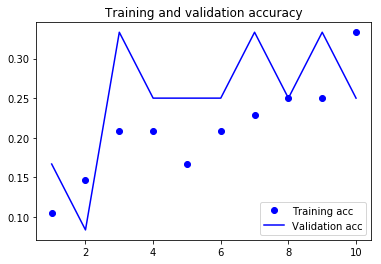

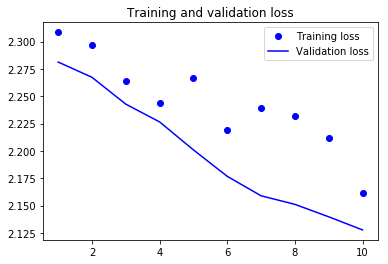

In [25]:
# generate the graph for training and validation accuracy, and training and validation loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
# try to predict a new text sentence
txt = ["Regular fast food eating linked to fertility issues in women"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['Info', 'Loans', 'Branch', 'Branch', 'Loans', 'Offers', 'Branch',
       'InternetBanking', 'Loans', 'Branch']
print(pred, labels[np.argmax(pred)])

[[1.0663921e-04 5.1352254e-04 1.0853143e-04 9.9927133e-01]] health


In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("C:/Users/sumud/Documents/AI/attempt2/final/model-3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("C:/Users/sumud/Documents/AI/attempt2/final/model-3.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))